# Feature Engineering and Selection
# Checking the Python Environment

This is to ensure that the correct Python environment is set up correctly and used

In [1]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Downloads\Machine Learning Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\Downloads\Machine Learning Assignment\ml-venv\Scripts\python.exe
Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x000002D0331EF710>
Sys paths: ['C:\\Users\\hp\\Downloads\\Machine Learning Assignment', 'C:\\Users\\hp\\anaconda3\\python311.zip', 'C:\\Users\\hp\\anaconda3\\DLLs', 'C:\\Users\\hp\\anaconda3\\Lib', 'C:\\Users\\hp\\anaconda3', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv', '', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment']


# Importing Libraries

This is to ensure that the necessary libraries are imported and used

In [2]:
# For DataFrame
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For serialisation and de-serialisation
import pickle

# Loading the Dataset

Following shows the raw dataset that is loaded into the notebook

In [3]:
df = pd.read_csv(r'../raw_data/customer_standard_scaled.csv', index_col = 'CUST_ID')

# Feature Engineering and Selection

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca_features_data = pca.fit_transform(df)

df_pca = pd.DataFrame(pca_features_data, index = df.index, columns = [f'PC{i+1}' for i in range(pca_features_data.shape[1])])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
CUST_ID,,,,,,,,,,,,,,,
C17875,0.426122,-2.319369,-1.449907,-0.881266,0.766330,-1.465080,0.145110,-0.327727,-0.367544,-0.505051,0.243303,-0.408082,-0.555342,-0.076272,-0.176238
C16296,1.198461,1.051690,0.540477,-0.739924,-0.454046,0.055716,1.610331,0.212774,-0.246047,0.106264,0.767071,-0.025827,-0.456209,-0.137853,0.145458
C17219,-1.999902,-0.595340,1.922875,0.877842,-0.328039,-0.218768,0.383368,-0.429526,-0.700053,0.089755,-0.296538,-0.524953,-0.059765,0.169339,-0.022497
C13108,-0.442146,1.290127,-0.705398,-0.139429,-1.445350,0.289122,1.511690,0.127708,-0.222266,-0.761393,0.035204,0.091722,0.093934,0.262234,-0.273967
C13576,-2.064534,2.835500,0.107411,0.391108,0.219520,-0.589792,-0.302277,0.617933,-0.733354,0.205436,0.260788,-0.304921,0.097113,-0.278185,0.046394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C14210,2.393551,-1.127674,0.053223,0.859287,0.293766,0.359398,-0.099911,-0.653339,-0.103305,-0.895932,0.145807,0.027942,-0.004747,-0.077488,0.223775
C17858,-1.898455,-1.274276,-0.735767,0.253601,0.132549,-1.136783,0.537879,-0.098031,-0.457184,0.445523,0.571416,0.341936,-0.499377,-0.048926,-0.011294
C12903,-2.502074,-2.671457,0.399436,-0.674548,1.335930,-0.627254,0.600485,0.481502,0.756298,0.057462,-0.348056,0.147211,0.274845,0.139114,0.016297


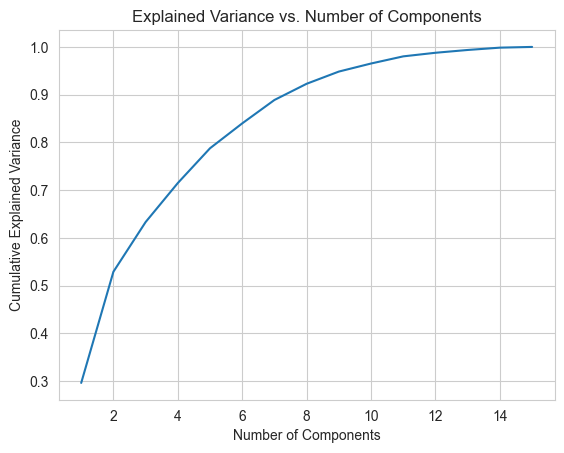

In [5]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

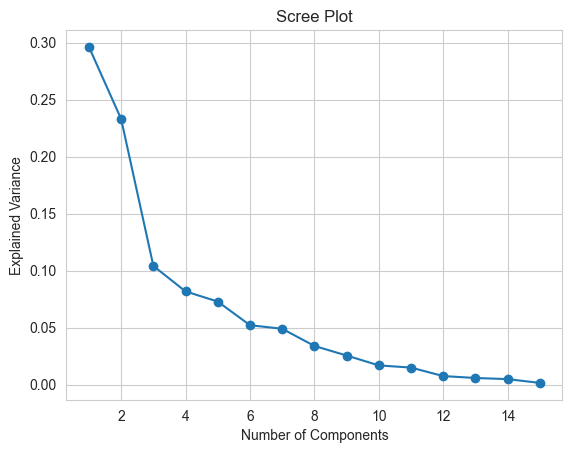

In [6]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

It can be seen that most variance are explain by the first 5 components. Therefore, we will use the first 5 components for the model for experimental purposes

# Saving the Dataset

In [7]:
df_pca = df_pca.iloc[:, :5]
df_pca.to_csv(r'../raw_data/customer_pca_5.csv')